In [1]:

%matplotlib inline
import sys
sys.path.append("../") # go to parent dir

import numpy as np
import torch
import matplotlib.pyplot as plt
import mpmath

from synthetic.generate import SingleTaskTreeDepsGenerator
from metal.label_model import LabelModel
from metal.label_model.utils import (
    compute_mu,
    compute_covariance,
    compute_inv_covariance,
    print_matrix,
    visualize_matrix
)

/lfs/1/annhe/anaconda3/envs/metal/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
# Generate synthetic dataset using the deterministic edge function
np.random.seed(1)
N = 50
M = 5
K = 2
edges_list = []
#edges_list.append((3,1))
edges_list.append((2,4))
#edges_list.append((2,1))
data = SingleTaskTreeDepsGenerator(N, M, k=K, edge_prob=1.0, edges_list=edges_list)


(0, 1)   [0.22596951 0.81316323]
(0, 2)   [0.12682122 0.89481293]
(1, 1)   [0.58670937 0.50318216]
(1, 2)   [0.90292228 0.43982591]
(2, 1)   [0.58458222 0.68706899]
(2, 2)   [0.42513492 0.61390771]
(3, 1)   [0.67405284 0.2136834 ]
(3, 2)   [0.72118413 0.68297446]
(4, 1)   [0.41854518 0.78690975]
(4, 2)   [0.42087855 0.77750952]
((0, 1), 1, 1)   [0.27626837 0.10233384]
((0, 1), 1, 2)   [0.19962181 0.1147584 ]
((0, 1), 2, 1)   [0.25739029 0.11281347]
((0, 1), 2, 2)   [0.17106207 0.28836739]
((1, 2), 1, 1)   [0.17596066 0.25258401]
((1, 2), 1, 2)   [0.254319  0.1602721]
((1, 2), 2, 1)   [0.25454783 0.13058596]
((1, 2), 2, 2)   [0.21572679 0.1018016 ]
((0, 3), 1, 1)   [0.2418085  0.19412816]
((0, 3), 1, 2)   [0.25291851 0.19347854]
((0, 3), 2, 1)   [0.15380021 0.26633852]
((0, 3), 2, 2)   [0.21026499 0.1140163 ]
((1, 4), 1, 1)   [0.19449501 0.24855297]
((1, 4), 1, 2)   [0.13839122 0.1928623 ]
((1, 4), 2, 1)   [0.14607256 0.20164951]
((1, 4), 2, 2)   [0.14171366 0.10986085]
((2, 4), 1, 1)  

P(L_ 0 = 0 , L_ 4 = 2  | Y =  2 ) =  0.0563751712758119
P(L_ 0 = 1 , L_ 4 = 0  | Y =  2 ) =  0.065422475204581
P(L_ 0 = 1 , L_ 4 = 1  | Y =  2 ) =  0.1731019057284797
P(L_ 0 = 1 , L_ 4 = 2  | Y =  2 ) =  0.16151312951440402
P(L_ 0 = 2 , L_ 4 = 0  | Y =  2 ) =  0.0752674226455723
P(L_ 0 = 2 , L_ 4 = 1  | Y =  2 ) =  0.19941126538920334
P(L_ 0 = 2 , L_ 4 = 2  | Y =  2 ) =  0.18567179436057962
Labelers =  (1, 2)
P(L_ 1 = 0 , L_ 2 = 0  | Y =  2 ) =  0.03504784738891147
P(L_ 1 = 0 , L_ 2 = 1  | Y =  2 ) =  0.06967093225856595
P(L_ 1 = 0 , L_ 2 = 2  | Y =  2 ) =  0.06475571124355724
P(L_ 1 = 1 , L_ 2 = 0  | Y =  2 ) =  0.07634209703028164
P(L_ 1 = 1 , L_ 2 = 1  | Y =  2 ) =  0.19536654754872423
P(L_ 1 = 1 , L_ 2 = 2  | Y =  2 ) =  0.1655716978598759
P(L_ 1 = 2 , L_ 2 = 0  | Y =  2 ) =  0.0740460522209615
P(L_ 1 = 2 , L_ 2 = 1  | Y =  2 ) =  0.1677277594122866
P(L_ 1 = 2 , L_ 2 = 2  | Y =  2 ) =  0.15147135503683545
Labelers =  (1, 3)
P(L_ 1 = 0 , L_ 3 = 0  | Y =  2 ) =  0.03564276301774095
P

In [3]:
print(data.sig_inv)

[[ 7.30409414e+00  4.92317038e+00 -2.45342648e-01 -1.80838922e-01
  -1.10557285e-03 -1.95052704e-03 -2.34845533e-01 -2.47683766e-01
  -4.64089373e-04 -4.66657886e-04]
 [ 4.92330697e+00  7.60897086e+00 -2.36077632e-01 -2.03102193e-01
  -3.34237449e-05 -1.84198099e-03 -1.83966615e-01 -1.96944921e-01
  -4.20590449e-03 -3.44441864e-03]
 [-2.12829014e-01 -2.04837163e-01  9.84167601e+00  7.31118264e+00
   5.48753793e-01  5.16495569e-01  4.20897260e-02  4.05328437e-02
   6.55265839e-01  7.18000703e-01]
 [-1.62613977e-01 -1.85892925e-01  7.28752858e+00  9.45417345e+00
   3.62483925e-01  4.07801679e-01  2.29822403e-02  2.34042135e-02
   6.73170690e-01  7.04254115e-01]
 [ 6.56367655e-01  6.45206848e-01  8.27830127e-01  8.26968382e-01
   8.01801972e+00  5.76588914e+00  8.30264930e-01  8.07307639e-01
   7.82298755e-01  8.12296509e-01]
 [ 6.28251389e-01  6.16672773e-01  7.50507754e-01  8.23321372e-01
   5.75991860e+00  8.37703336e+00  7.95568744e-01  7.73629941e-01
   7.63103300e-01  7.97872086e-01

[(0, 1), (1, 2), (0, 3), (1, 4), (2, 4)]


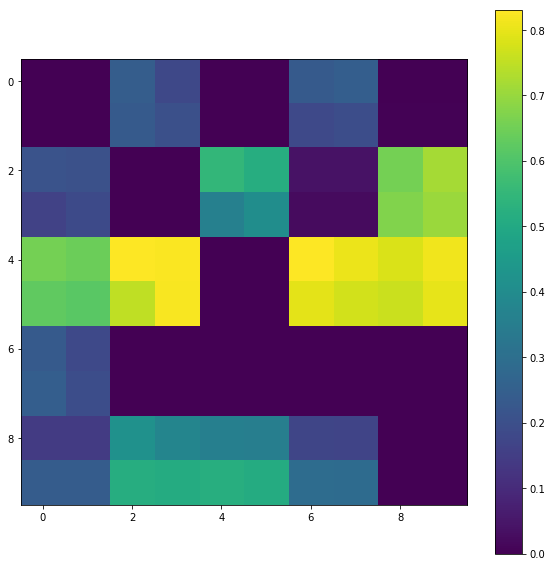

In [4]:
print(data.E)
sg_no_diag = np.copy(data.sig_inv)
for i in range(M):
    sg_no_diag[i*2:i*2+2,i*2:i*2+2] = np.zeros([2,2])
visualize_matrix(np.abs(sg_no_diag))

In [5]:
# Generate synthetic dataset
np.random.seed(1)
N = 50
M = 5
K = 2
EDGE_PROB=1.0
data = SingleTaskTreeDepsGenerator(N, M, k=K, edge_prob=EDGE_PROB)

(0, 1)   [0.44911967 0.70277143]
(0, 2)   [0.94198516 0.86167983]
(1, 1)   [0.38194617 0.57209334]
(1, 2)   [0.4991076  0.30661949]
(2, 1)   [0.58097252 0.92256582]
(2, 2)   [0.51148433 0.48762871]
(3, 1)   [0.94521501 0.80055031]
(3, 2)   [0.74437346 0.82248175]
(4, 1)   [0.18352073 0.56633729]
(4, 2)   [0.87851823 0.84623222]
((0, 1), 1, 1)   [0.26592067 0.15460999]
((0, 1), 1, 2)   [0.11184864 0.23410561]
((0, 1), 2, 1)   [0.2186131  0.23433082]
((0, 1), 2, 2)   [0.18235758 0.13951018]
((1, 2), 1, 1)   [0.15792593 0.12842403]
((1, 2), 1, 2)   [0.25666289 0.18250777]
((1, 2), 2, 1)   [0.10683426 0.224806  ]
((1, 2), 2, 2)   [0.23212715 0.15969906]
((0, 3), 1, 1)   [0.1892269  0.14442491]
((0, 3), 1, 2)   [0.11467283 0.19384771]
((0, 3), 2, 1)   [0.11923445 0.28067403]
((0, 3), 2, 2)   [0.12389809 0.20495988]
((0, 4), 1, 1)   [0.1167246  0.28337227]
((0, 4), 1, 2)   [0.28208968 0.15978602]
((0, 4), 2, 1)   [0.21687782 0.21318241]
((0, 4), 2, 2)   [0.22278766 0.29130713]
Labeler =  0
i

P(L_ 0 = 1 , L_ 3 = 1  | Y =  2 ) =  0.15580372299908915
P(L_ 0 = 1 , L_ 3 = 2  | Y =  2 ) =  0.167327214862291
P(L_ 0 = 2 , L_ 3 = 0  | Y =  2 ) =  0.07378587489803325
P(L_ 0 = 2 , L_ 3 = 1  | Y =  2 ) =  0.217541940590542
P(L_ 0 = 2 , L_ 3 = 2  | Y =  2 ) =  0.2061510072527756
Labelers =  (0, 4)
P(L_ 0 = 0 , L_ 4 = 0  | Y =  2 ) =  0.023333825237041195
P(L_ 0 = 0 , L_ 4 = 1  | Y =  2 ) =  0.04110958593741411
P(L_ 0 = 0 , L_ 4 = 2  | Y =  2 ) =  0.05438760351746675
P(L_ 0 = 1 , L_ 4 = 0  | Y =  2 ) =  0.06317283127210957
P(L_ 0 = 1 , L_ 4 = 1  | Y =  2 ) =  0.1477591945407855
P(L_ 0 = 1 , L_ 4 = 2  | Y =  2 ) =  0.17275813675383198
P(L_ 0 = 2 , L_ 4 = 0  | Y =  2 ) =  0.07897105111968822
P(L_ 0 = 2 , L_ 4 = 1  | Y =  2 ) =  0.1721904347855388
P(L_ 0 = 2 , L_ 4 = 2  | Y =  2 ) =  0.2463173368361238
Labelers =  (1, 2)
P(L_ 1 = 0 , L_ 2 = 0  | Y =  2 ) =  0.036930930162021335
P(L_ 1 = 0 , L_ 2 = 1  | Y =  2 ) =  0.09290850928781223
P(L_ 1 = 0 , L_ 2 = 2  | Y =  2 ) =  0.06014017733018521